In [24]:
import pandas as pd 
import numpy as np 
import os
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [25]:
INPUT_PATH = '../../data/preprocessed/alldata_merged.csv'

df = pd.read_csv(INPUT_PATH)

df = df.drop(columns=['specific_energy_kwh/kwp', 'latitude', 'longitude', 'connection_power_kwh', 'temperature_2m_celsius', 'relative_humidity_2m_%', 'dew_point_2m_celsius', 'apparent_temperature_celsius', 'cloud_cover_%', 'wind_speed_10m_km/h', 'wind_direction_10m_degree'])

df.head()

print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315567 entries, 0 to 315566
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   date                      315567 non-null  object 
 1   produced_energy_kwh       315567 non-null  float64
 2   serial_number             315567 non-null  int64  
 3   location                  315567 non-null  object 
 4   installed_power_kwp       315567 non-null  float64
 5   shortwave_radiation_w/m2  315567 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 14.4+ MB
None


In [26]:
model = LinearRegression()
serial_number = df['serial_number'].unique()
count_serial_number = len(serial_number)
print(f"Anzahl der Seriennummern: {count_serial_number}")

Anzahl der Seriennummern: 9


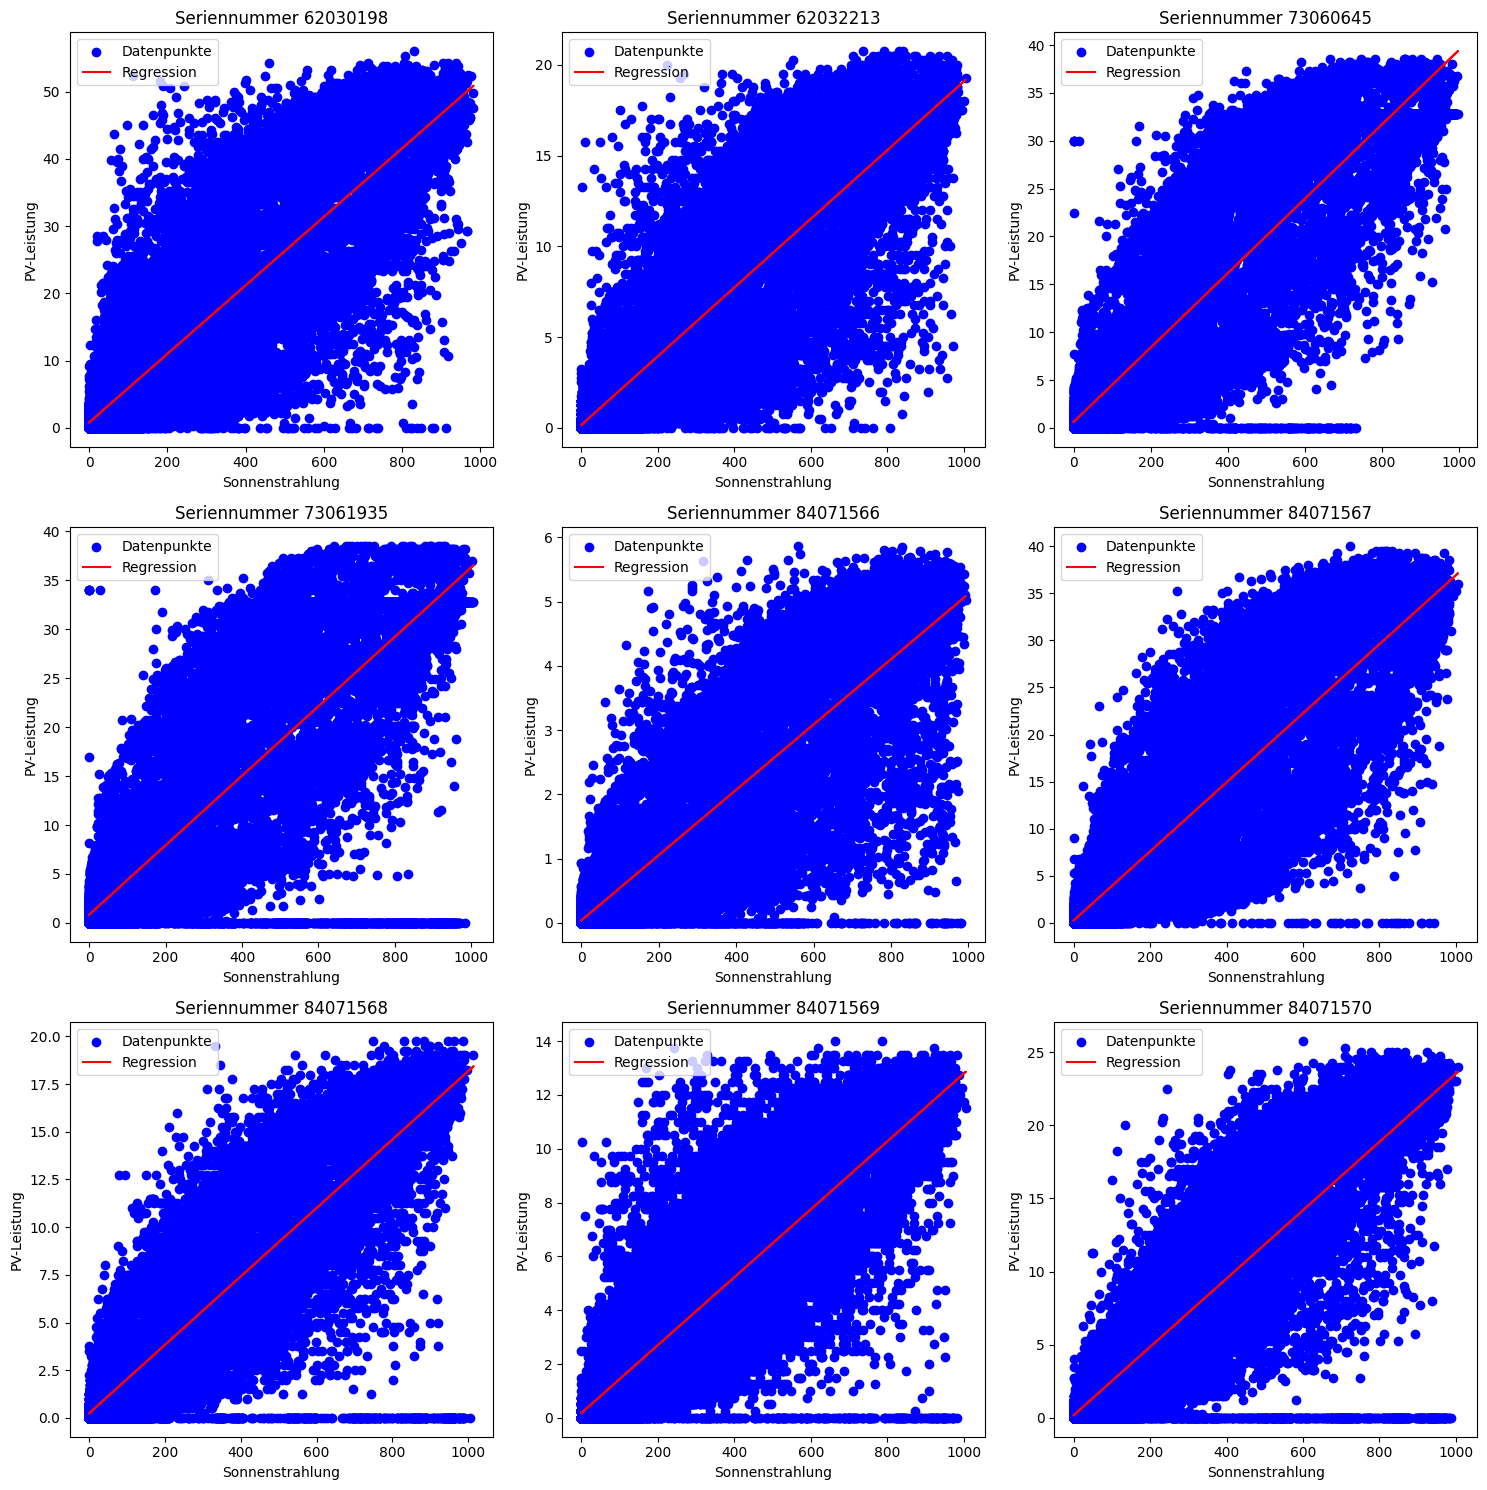

In [27]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for idx, (serial_number, gruppe) in enumerate(df.groupby('serial_number')):
    if idx >= len(axes):  # Sicherstellen, dass wir nur die vorhandenen Achsen verwenden
        break
    
    ax = axes[idx]

    X = gruppe['shortwave_radiation_w/m2'].values.reshape(-1, 1)
    y = gruppe['produced_energy_kwh'].values

    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Scatterplot und Regressionslinie
    ax.scatter(X, y, color='blue', label='Datenpunkte')
    ax.plot(X, y_pred, color='red', label='Regression')
    
    # Titel und Achsenbeschriftungen
    ax.set_title(f"Seriennummer {serial_number}")
    ax.set_xlabel("Sonnenstrahlung")
    ax.set_ylabel("PV-Leistung")
    ax.legend()

# Unbenutzte Plots ausblenden
for idx in range(count_serial_number, len(axes)):
    fig.delaxes(axes[idx])

# Layout optimieren
plt.tight_layout()
plt.show()